In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Set data path and load training data
file_path = "../data"
train_full = pd.read_csv(f'{file_path}/train.csv')

# Drop unncessary columns 
train_full = train_full.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1)

# Drop rows that have missing embarked as we cannot impute it
train_full = train_full.dropna(subset = ['Embarked'])

train_full.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Create objects for numerical and categorical columns
object_cols = [col for col in train_full.columns if train_full[col].dtype == 'object']
numerical_cols = [col for col in train_full.columns if train_full[col].dtype in ['int64', 'float64']]

<AxesSubplot:xlabel='Survived', ylabel='Age'>

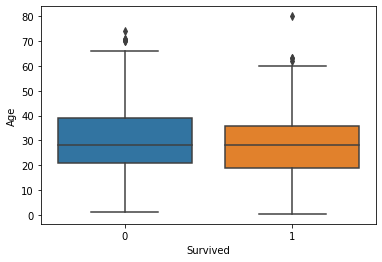

In [4]:
# Visualize Age and Survived variables
fig, axes = plt.subplots(1,1)
sns.boxplot(ax=axes, data = train_full, y='Age', x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

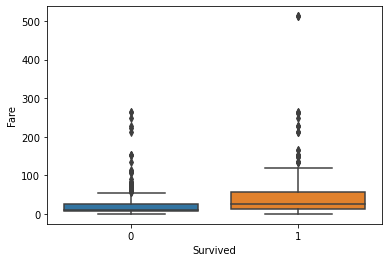

In [5]:
# Visualize Fare and Survived variables
fig, axes = plt.subplots(1,1)
sns.boxplot(ax=axes, data = train_full, y='Fare', x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

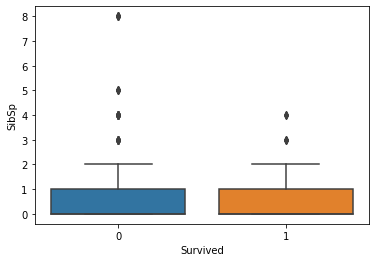

In [6]:
# Visualize SibSp and Survived variables
fig, axes = plt.subplots(1,1)
sns.boxplot(ax=axes, data = train_full, y='SibSp', x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

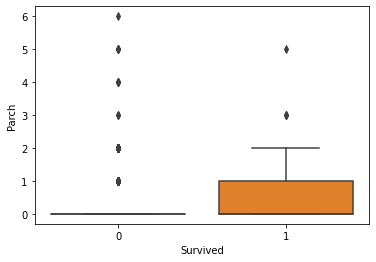

In [7]:
# Visualize Parch and Survived variables
fig, axes = plt.subplots(1,1)
sns.boxplot(ax=axes, data = train_full, y='Parch', x='Survived')

Text(0, 0.5, 'Percentage(%)')

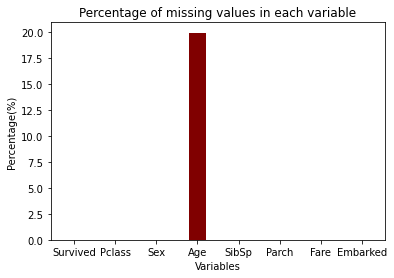

In [8]:
# Visualize missing values

# Initialize empty dictionary
na_dict = {}

# Get a count of missing values for each variable
for var in train_full.columns:
    total_na = train_full[var].isnull().sum()
    percent_na = (total_na/len(train_full))*100
    na_dict[var] = percent_na
    
cols = list(na_dict.keys())
percent_na = list(na_dict.values())

plt.bar(cols, percent_na, color = 'maroon', width=0.4)
plt.title("Percentage of missing values in each variable")
plt.xlabel("Variables")
plt.ylabel("Percentage(%)")

Text(0, 0.5, 'Percentage(%)')

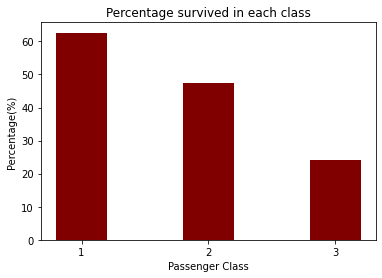

In [9]:
# Visualize total number of survived in each passenger class
total = train_full.groupby('Pclass')['Survived'].count()
survived = train_full.groupby('Pclass')['Survived'].apply(lambda x: x[x == 1].count())
percent_survived = (survived/total)*100

plt.bar(percent_survived.index, percent_survived.values, color = 'maroon', width = 0.4)
plt.xticks(percent_survived.index)
plt.title("Percentage survived in each class")
plt.xlabel("Passenger Class")
plt.ylabel("Percentage(%)")

Text(0, 0.5, 'Percentage(%)')

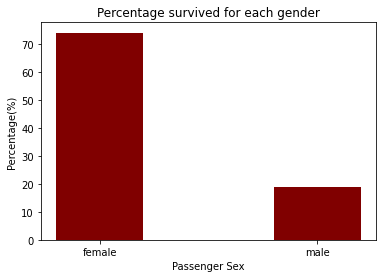

In [10]:
# Visualize total number of survived according to sex
total = train_full.groupby('Sex')['Survived'].count()
survived = train_full.groupby('Sex')['Survived'].apply(lambda x: x[x == 1].count())
percent_survived = (survived/total)*100

plt.bar(percent_survived.index, percent_survived.values, color = 'maroon', width = 0.4)
plt.xticks(percent_survived.index)
plt.title("Percentage survived for each gender")
plt.xlabel("Passenger Sex")
plt.ylabel("Percentage(%)")